A. Text Preprocessing 
Text preprocessing dilakukan untuk membersihkan, memformat, dan menyederhanakan data teks sehingga lebih mudah untuk diolah oleh algoritma machine learning atau analisis data. Proses yang digunakan untuk setiap dataset berbeda-beda menyesuaikan kebutuhan dari dataset. Pada dataset ini akan dilakukan 

1. Case Folding
2. Tokenisasi
3. Normalisasi
4. Stemming 
5. Visualisasi

Data didapatkan dengan melakukan proses scraping pada Twitter dengan bantuan library python yaitu selenium. Selenium membantu automati web secara otomatis. Hasil yang didapatkan sebanyak 17.276 kemudian disimpan kedalam format csv.

In [1]:
# Membuka file menggunakan pandas 
import pandas as pd 

df = pd.read_csv('data3-string-new.csv',sep=';',encoding= 'unicode_escape') 
df.head()

,Text,Label
0,kontoll,Tidak Diketahui Masalahnya
1,KONTOL,Tidak Diketahui Masalahnya
2,bgst projects yang kapasitas kerjanya butuh 3 ...,Karir/Pekerjaan
3,anjiinggg,Tidak Diketahui Masalahnya
4,PUNYA ORANGTUA GOBLOKK TOLOLLL UDAH PADA TUA M...,Keluarga


In [2]:
# Melihat dimensi dataset (baris,kolom)
df.shape

(17276, 2)

In [3]:
#  Menghitung jumlah nilai yang hilang dalam dataset
df.isna().sum()

Text     0
Label    0
dtype: int64

In [4]:
# Mendapatkan tipe data dari setiap kolom 
result = df.dtypes

print("Output:")
print(result)

Output:
Text     object
Label    object
dtype: object


In [5]:
#df["Label"] = df["Label"].astype("Int64")

In [6]:
df.head()

,Text,Label
0,kontoll,Tidak Diketahui Masalahnya
1,KONTOL,Tidak Diketahui Masalahnya
2,bgst projects yang kapasitas kerjanya butuh 3 ...,Karir/Pekerjaan
3,anjiinggg,Tidak Diketahui Masalahnya
4,PUNYA ORANGTUA GOBLOKK TOLOLLL UDAH PADA TUA M...,Keluarga


In [7]:
# menghitung frekuensi masing-masing nilai unik dalam kolom "Label" 
df['Label'].value_counts()

Tidak Diketahui Masalahnya     5681
Person/Personal                5004
Percintaan                     2349
Keluarga                       1922
Studi                          1637
Karir/Pekerjaan                 683
Name: Label, dtype: int64

1. Case Folding

Setelah itu kita akan melakukan proses Case Folding pada Dataframe tweet diatas menggunakan fungsi lower() pada class Series.str library Pandas. Penggunakan Fungsi internal pandas ini jauh lebih cepat dibandingkan jika kita melakukan iterasi untuk semua row pada dataframe dan melakukan Case Folding row by row menggunakan .lower() biasa.

In [8]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
df['Text'] = df['Text'].str.lower()


print('Case Folding Result : \n')
print(df['Text'].head(5))
print('\n\n\n')

Case Folding Result : 

0                                              kontoll
1                                               kontol
2    bgst projects yang kapasitas kerjanya butuh 3 ...
3                                            anjiinggg
4    punya orangtua goblokk tololll udah pada tua m...
Name: Text, dtype: object






2. Tokenizing

Ditahap ini akan dilakukan proses number removal, whitecase removal, puntuation removal dan word_tokenize() untuk memecah string kedalam tokens. Pandas Dataframe atau Series mampu menjalankan function external untuk di terapkan pada kolom atau baris dengan menggunakan fungsi .apply() .

In [9]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
import nltk
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

In [10]:
# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['Tweet'] = df['Text'].apply(remove_tweet_special)

In [11]:
#remove number

def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['Text'] = df['Text'].apply(remove_number)

In [12]:
#remove punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Text'] = df['Text'].apply(remove_punctuation)

In [13]:
#remove whitespace leading & trailing

def remove_whitespace_LT(text):
    return text.strip()

df['Text'] = df['Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Text'] = df['Text'].apply(remove_whitespace_multiple)

In [14]:
# remove single char

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Text'] = df['Text'].apply(remove_singl_char)

In [15]:
# NLTK word tokenize 

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tweet_tokens'] = df['Text'].apply(word_tokenize_wrapper)

In [16]:
print('Tokenizing Result : \n') 
print(df['tweet_tokens'].head(10))
print('\n\n\n')

Tokenizing Result : 

0                                            [kontoll]
1                                             [kontol]
2    [bgst, projects, yang, kapasitas, kerjanya, bu...
3                                          [anjiinggg]
4    [punya, orangtua, goblokk, tololll, udah, pada...
5                                      [bokap, kontol]
6     [bentar, lagi, ada, kabar, dating, haaaaaaahaha]
7                        [semester, ini, agak, kontol]
8                                         [ah, kontol]
9    [kerja, pada, gaa, amanah, gila, yaa, loo, sem...
Name: tweet_tokens, dtype: object






kita juga dapat menghitung frekuensi distribusi token pada tiap row data pada Dataframe dengan menggunakan fungsi .freqDist() kedalam fungsi .apply() .

In [17]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

df['tweet_tokens_fdist'] = df['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df['tweet_tokens_fdist'].head(10).apply(lambda x : x.most_common()))

Frequency Tokens : 

0                                       [(kontoll, 1)]
1                                        [(kontol, 1)]
2    [(bgst, 1), (projects, 1), (yang, 1), (kapasit...
3                                     [(anjiinggg, 1)]
4    [(punya, 1), (orangtua, 1), (goblokk, 1), (tol...
5                            [(bokap, 1), (kontol, 1)]
6    [(bentar, 1), (lagi, 1), (ada, 1), (kabar, 1),...
7    [(semester, 1), (ini, 1), (agak, 1), (kontol, 1)]
8                               [(ah, 1), (kontol, 1)]
9    [(kerja, 1), (pada, 1), (gaa, 1), (amanah, 1),...
Name: tweet_tokens_fdist, dtype: object


Normalization

Normalization digunakan untuk menyeragamkan term yang memiliki makna sama namun penulisanya berbeda, bisa diakibatkan kesalahan penulisan, penyingkatan kata, ataupun “bahasa gaul”.

Contohnya :

knapa   : kenapa

knp     : kenapa

smpai   : sampai

sampe   : sampai

nyampe  : sampai


In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

In [20]:
normalizad_word = pd.read_csv("normalisasi.csv", sep=';')

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['tweet_normalized'] = df['tweet_tokens'].apply(normalized_term)

#df['tweet_normalized'].sample(10)
df['tweet_normalized'].tail(5)

17271    [anjinggg, sbsjehsish, mantan, gue, ngadoin, l...
17272    [sudah, waktunya, gajian, malah, enggak, gajia...
17273    [sepupu, cowok, gue, enggak, sopan, banget, an...
17274                                     [anjing, anjing]
17275                        [kapan, kapan, kapan, pantek]
Name: tweet_normalized, dtype: object

4. Stemming 

Stemming adalah proses dalam teks preprocessing yang bertujuan untuk mengurangi kata-kata dalam teks menjadi bentuk dasarnya atau "akar kata" (root word). Tujuan utama dari stemming adalah untuk mengatasi variasi morfologis kata-kata sehingga kata-kata yang memiliki akar yang sama dapat diidentifikasi sebagai bentuk yang sama.

Sebagai contoh, kata "berlari", "berlarian", dan "berlari-lari" dapat di-stem menjadi bentuk dasarnya, yaitu "lari".

In [21]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [31]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
#Setiap kata dalam dokumen diambil dan digunakan sebaga
for document in df['tweet_normalized']:
    for term in document:
        #Jika term belum ada dalam kamus term_dict, maka term dimasukkan ke dalam kamus
        if term not in term_dict:
            term_dict[term] = ' '
          
print(len(term_dict))
print("------------------------")



#diubah menjadi bentuk kata dasar
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    #print(term,":" ,term_dict[term])

""""    
print(term_dict)
print("------------------------")
"""

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['tweet_tokens_stemmed'] = df['tweet_normalized'].swifter.apply(get_stemmed_term).head()
#print(df['tweet_tokens_stemmed'].head())

17269
------------------------


Pandas Apply:   0%|          | 0/17276 [00:00<?, ?it/s]

In [21]:
df.dtypes

Text                    object
Label                   object
Tweet                   object
tweet_tokens            object
tweet_tokens_fdist      object
tweet_normalized        object
tweet_tokens_stemmed    object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17276 entries, 0 to 17275
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Text                  17276 non-null  object
 1   Label                 17276 non-null  object
 2   Tweet                 17276 non-null  object
 3   tweet_tokens          17276 non-null  object
 4   tweet_tokens_fdist    17276 non-null  object
 5   tweet_normalized      17276 non-null  object
 6   tweet_tokens_stemmed  17276 non-null  object
dtypes: object(7)
memory usage: 944.9+ KB


In [23]:
df.head()

,Text,Label,Tweet,tweet_tokens,tweet_tokens_fdist,tweet_normalized,tweet_tokens_stemmed
0,kontoll,Tidak Diketahui Masalahnya,kontoll,[kontoll],{'kontoll': 1},[kontol],[kontol]
1,kontol,Tidak Diketahui Masalahnya,kontol,[kontol],{'kontol': 1},[kontol],[kontol]
2,bgst projects yang kapasitas kerjanya butuh or...,Karir/Pekerjaan,bgst projects yang kapasitas kerjanya butuh 3 ...,"[bgst, projects, yang, kapasitas, kerjanya, bu...","{'bgst': 1, 'projects': 1, 'yang': 1, 'kapasit...","[bgst, projects, yang, kapasitas, kerjanya, bu...","[bgst, projects, yang, kapasitas, kerja, butuh..."
3,anjiinggg,Tidak Diketahui Masalahnya,anjiinggg,[anjiinggg],{'anjiinggg': 1},[anjiinggg],[anjiinggg]
4,punya orangtua goblokk tololll udah pada tua m...,Keluarga,punya orangtua goblokk tololll udah pada tua m...,"[punya, orangtua, goblokk, tololll, udah, pada...","{'punya': 1, 'orangtua': 1, 'goblokk': 1, 'tol...","[punya, orangtua, goblokk, tololll, sudah, pad...","[punya, orangtua, goblokk, tololll, sudah, pad..."


In [24]:
df.to_csv("Text_Preprocessing.csv")

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud,ImageColorGenerator
from wordcloud import WordCloud

In [26]:
df = pd.read_csv("Text_Preprocessing.csv",encoding= 'unicode_escape',on_bad_lines='skip')
df.tail(5)

,Unnamed: 0,Text,Label,Tweet,tweet_tokens,tweet_tokens_fdist,tweet_normalized,tweet_tokens_stemmed
17271,17271,anjinggg sbsjehsish mantan gue ngadoin lego ta...,Percintaan,anjinggg sbsjehsish mantan gue ngadoin lego ta...,"['anjinggg', 'sbsjehsish', 'mantan', 'gue', 'n...",<FreqDist with 22 samples and 22 outcomes>,"['anjinggg', 'sbsjehsish', 'mantan', 'gue', 'n...","['anjinggg', 'sbsjehsish', 'mantan', 'gue', 'n..."
17272,17272,udah waktunya gajian malah ngga gajian kalo ke...,Karir/Pekerjaan,"udah waktunya gajian malah ngga gajian, kalo k...","['udah', 'waktunya', 'gajian', 'malah', 'ngga'...",<FreqDist with 8 samples and 9 outcomes>,"['sudah', 'waktunya', 'gajian', 'malah', 'engg...","['sudah', 'waktu', 'gaji', 'malah', 'enggak', ..."
17273,17273,sepupu cowok gue gak sopan bgt anjg tiba masuk...,Keluarga,"sepupu cowok gue gak sopan bgt anjg tiba"" masu...","['sepupu', 'cowok', 'gue', 'gak', 'sopan', 'bg...",<FreqDist with 18 samples and 19 outcomes>,"['sepupu', 'cowok', 'gue', 'enggak', 'sopan', ...","['sepupu', 'cowok', 'gue', 'enggak', 'sopan', ..."
17274,17274,anjing anjing,Tidak Diketahui Masalahnya,anjing anjing,"['anjing', 'anjing']",<FreqDist with 1 samples and 2 outcomes>,"['anjing', 'anjing']","['anjing', 'anjing']"
17275,17275,pan pan pan pantek,Tidak Diketahui Masalahnya,pan pan pan pantek,"['pan', 'pan', 'pan', 'pantek']",<FreqDist with 2 samples and 4 outcomes>,"['kapan', 'kapan', 'kapan', 'pantek']","['kapan', 'kapan', 'kapan', 'pantek']"


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Tidak Diketahui Masalahnya '),
  Text(1, 0, 'Karir/Pekerjaan'),
  Text(2, 0, 'Keluarga'),
  Text(3, 0, 'Percintaan'),
  Text(4, 0, 'Studi'),
  Text(5, 0, 'Person/Personal')])

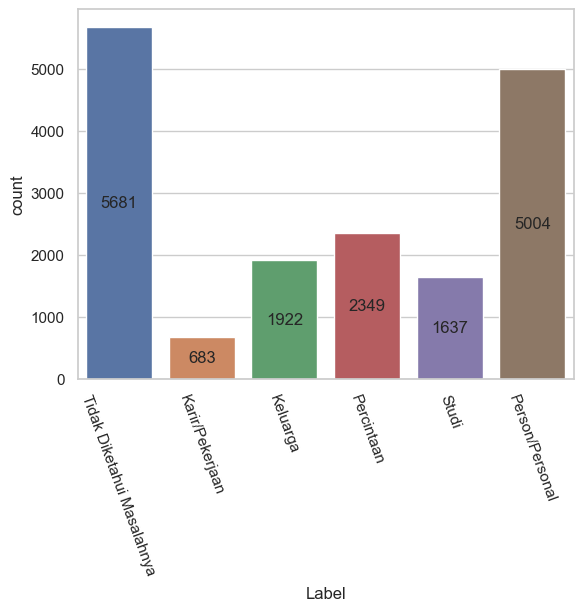

In [27]:

sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df["Label"], order=df['Label'].unique() )
ax.bar_label(ax.containers[0], fmt= '%0.f', label_type='center' ) 
plt.xticks(rotation=-70)

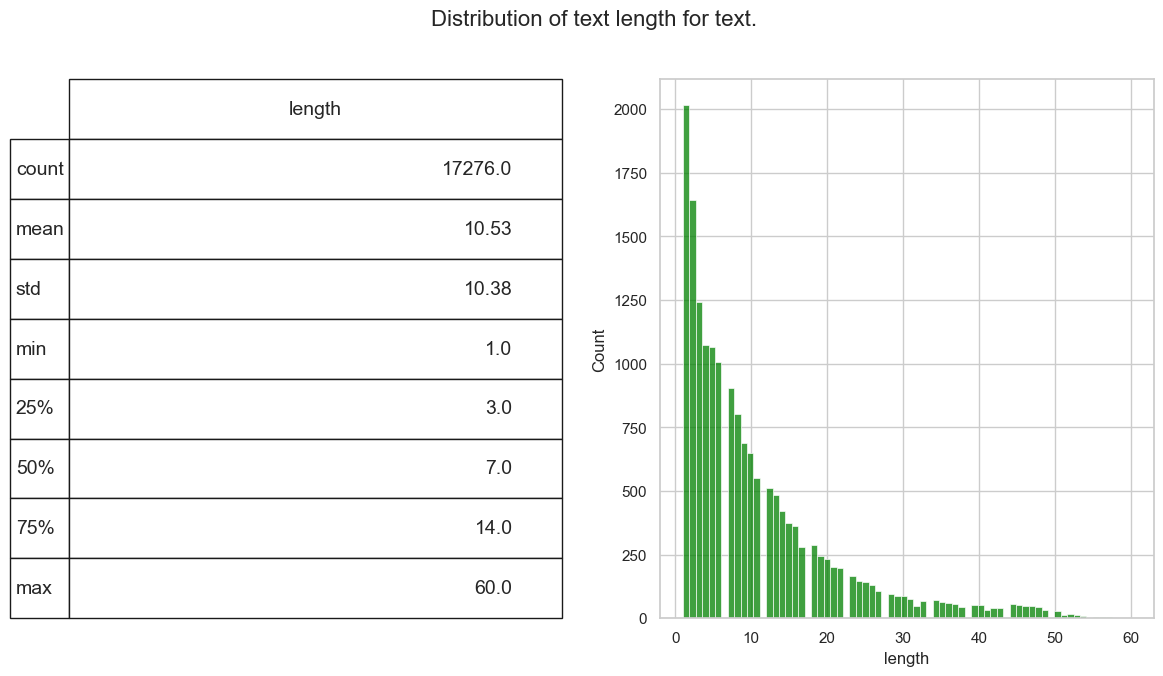

In [28]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Tweet.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

In [29]:
s_text = df[df['Label']== 'Studi' ]
pc_text = df[df['Label']== 'Percintaan' ] 
ke_text = df[df['Label']== 'Keluarga' ]
ka_text = df[df['Label']== 'Karir/Pekerjaan' ] 
pp_text = df[df['Label']== 'Person/Personal' ] 
u_text = df[df['Label']== 'Tidak Diketahui Masalahnya' ] 

In [30]:
top = Counter([item for sublist in s_text['tweet_tokens_stemmed'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in sport_text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

Word cloud adalah representasi visual dari kumpulan kata-kata dalam sebuah teks, di mana kata-kata yang paling sering muncul cenderung lebih besar dan lebih mencolok. Word cloud membantu pengguna untuk dengan cepat memahami konten suatu teks atau dokumen tanpa harus membaca secara rinci. Kata-kata yang lebih besar mencerminkan frekuensi kemunculan yang lebih tinggi, memberikan gambaran umum tentang fokus atau isu yang dibahas.

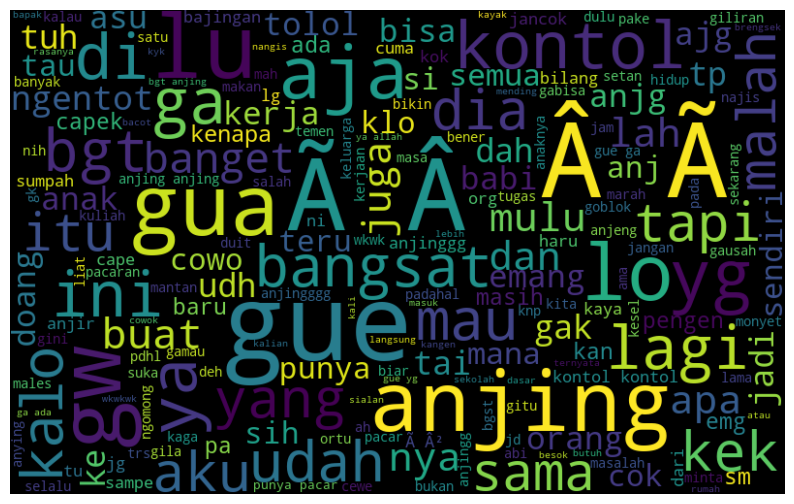

In [31]:
normal_words =' '.join([text for text in df['Text'].astype("str")])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

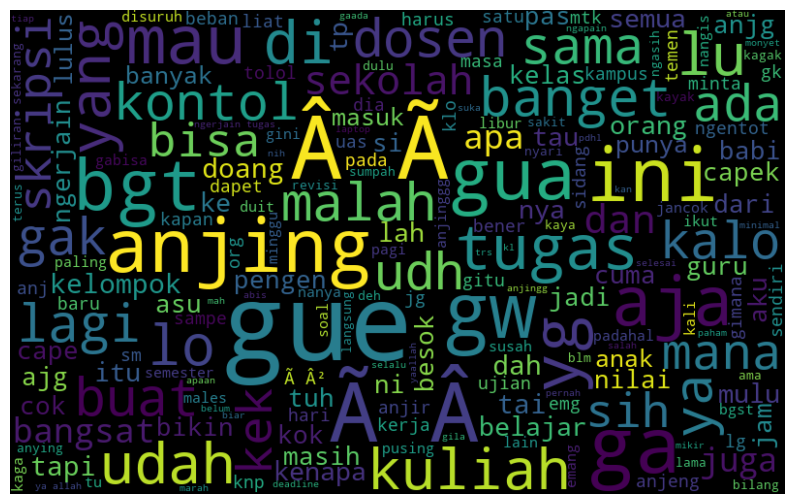

In [32]:
# kata-kata dari kolom 'Text' dalam DataFrame df yang memiliki label "Studi" diambil. 
# Kata-kata ini kemudian digabungkan menjadi satu string tunggal dengan spasi sebagai pemisah.
normal_words =' '.join([text for text in df['Text'][df['Label'] == 'Studi']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) #normal_words akan berisi semua kata-kata yang muncul dalam teks dengan label "Studi".
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
     

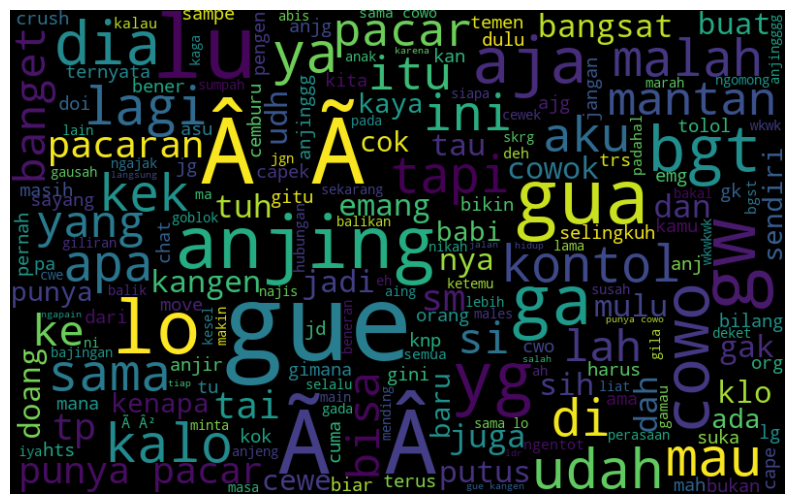

In [33]:
normal_words =' '.join([text for text in df['Text'][df['Label'] == 'Percintaan']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

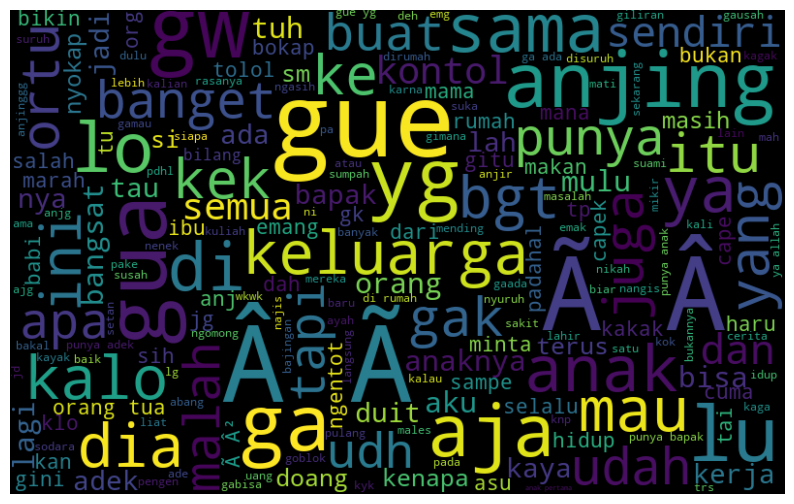

In [34]:
normal_words =' '.join([text for text in df['Text'][df['Label'] == 'Keluarga']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

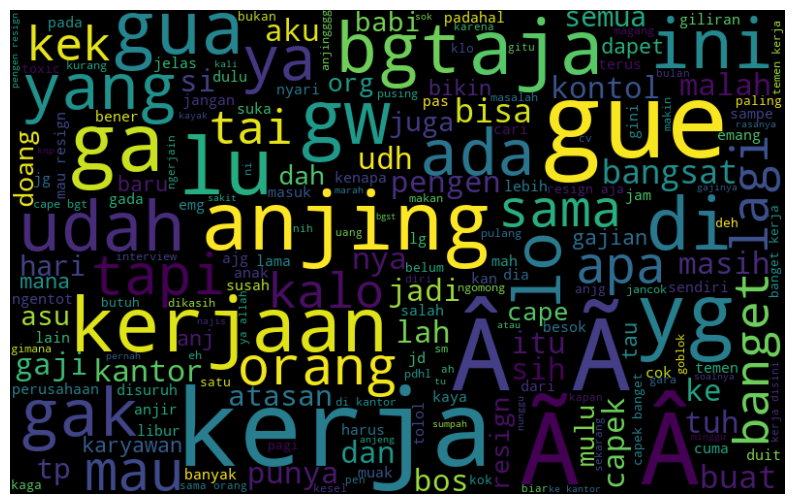

In [35]:
normal_words =' '.join([text for text in df['Text'][df['Label'] == 'Karir/Pekerjaan']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
     

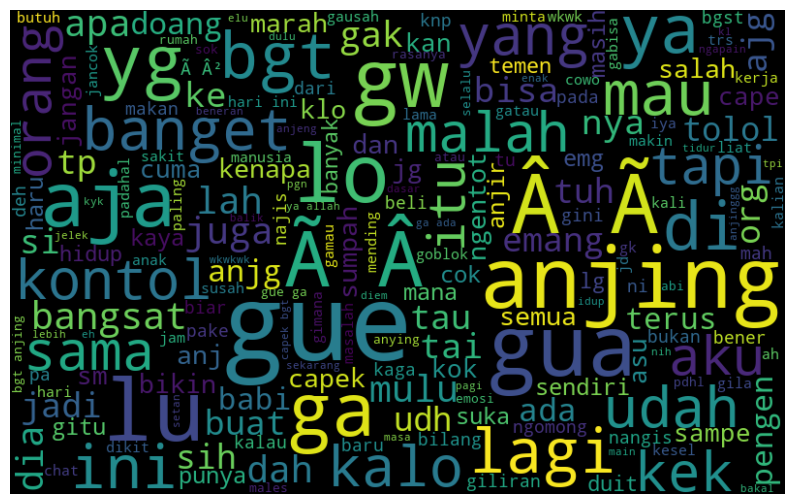

In [36]:
normal_words =' '.join([text for text in df['Text'][df['Label'] == 'Person/Personal']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

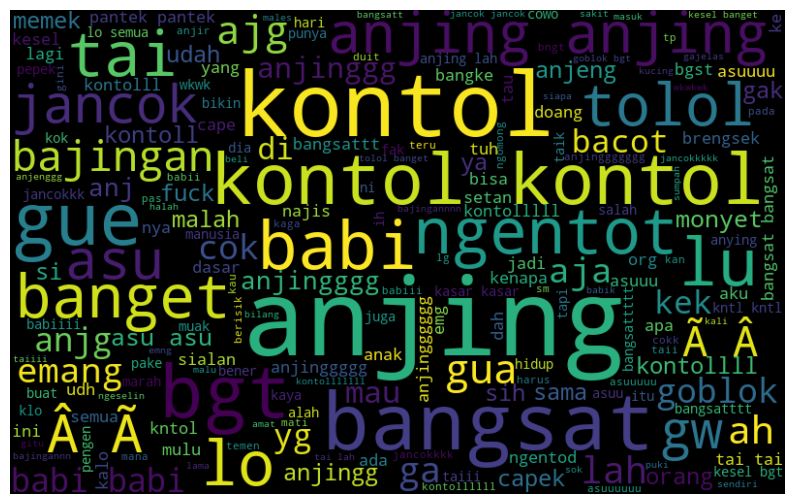

In [39]:
normal_words =' '.join([text for text in df['Text'][df['Label'] == 'Tidak Diketahui Masalahnya '].astype("str")])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Membuat kolom yang digunakan dalam proses pemodelan

In [40]:
df = pd.read_csv("Text_Preprocessing.csv", usecols=["Label", "tweet_tokens_stemmed"])
df.columns = ["label", "tweet"]

df.head()

,label,tweet
0,Tidak Diketahui Masalahnya,['kontol']
1,Tidak Diketahui Masalahnya,['kontol']
2,Karir/Pekerjaan,"['bgst', 'projects', 'yang', 'kapasitas', 'ker..."
3,Tidak Diketahui Masalahnya,['anjiinggg']
4,Keluarga,"['punya', 'orangtua', 'goblokk', 'tololll', 's..."


In [41]:
# convert list formated string to list
import ast

def convert_to_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df["tweet_list"] = df["tweet"].apply(convert_to_list)


print(df["tweet_list"][90])

print("\ntype : ", type(df["tweet_list"][90]))

['janco', 'janco', 'bangsat']

type :  <class 'list'>


In [42]:
df.head()

,label,tweet,tweet_list
0,Tidak Diketahui Masalahnya,['kontol'],[kontol]
1,Tidak Diketahui Masalahnya,['kontol'],[kontol]
2,Karir/Pekerjaan,"['bgst', 'projects', 'yang', 'kapasitas', 'ker...","[bgst, projects, yang, kapasitas, kerja, butuh..."
3,Tidak Diketahui Masalahnya,['anjiinggg'],[anjiinggg]
4,Keluarga,"['punya', 'orangtua', 'goblokk', 'tololll', 's...","[punya, orangtua, goblokk, tololll, sudah, pad..."


In [43]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df["Tweet"] = df["tweet"].apply(join_text_list)

df["Tweet"].head()

0                                               kontol
1                                               kontol
2    bgst projects yang kapasitas kerja butuh orang...
3                                            anjiinggg
4    punya orangtua goblokk tololll sudah pada tua ...
Name: Tweet, dtype: object

In [44]:
df.head()

,label,tweet,tweet_list,Tweet
0,Tidak Diketahui Masalahnya,['kontol'],[kontol],kontol
1,Tidak Diketahui Masalahnya,['kontol'],[kontol],kontol
2,Karir/Pekerjaan,"['bgst', 'projects', 'yang', 'kapasitas', 'ker...","[bgst, projects, yang, kapasitas, kerja, butuh...",bgst projects yang kapasitas kerja butuh orang...
3,Tidak Diketahui Masalahnya,['anjiinggg'],[anjiinggg],anjiinggg
4,Keluarga,"['punya', 'orangtua', 'goblokk', 'tololll', 's...","[punya, orangtua, goblokk, tololll, sudah, pad...",punya orangtua goblokk tololll sudah pada tua ...


In [45]:
df2 = df[['label', 'Tweet']]
df2.head()

,label,Tweet
0,Tidak Diketahui Masalahnya,kontol
1,Tidak Diketahui Masalahnya,kontol
2,Karir/Pekerjaan,bgst projects yang kapasitas kerja butuh orang...
3,Tidak Diketahui Masalahnya,anjiinggg
4,Keluarga,punya orangtua goblokk tololll sudah pada tua ...


In [46]:
df2.shape

(17276, 2)

In [47]:
df2.to_csv("dataset.csv",index=False)

B. Pemodelan

pada proses ini akan dilakukan klasifikasi teks menggunakan algoritma BiLSTM. Hal tersebut dikarenakan BiLSTM mampu mengakses informasi dari kedua arah, yaitu dari masa lalu dan masa depan sekaligus. Hal ini dapat membantu dalam memahami konteks lebih baik, terutama dalam tugas-tugas yang memerlukan pemahaman global dari data sekuensial.
Data akan dibagi menjadi enam kategori, yaitu Studi, Keluarga, Percintaan, Karier/Pekerjaan, Person/Personal, dan Tidak Diketahui Masalahnya. Pengelmopokan ini berdasarkan pakar psikologi yaitu dosen psikologi UII, Ibu Dr. Rina Mulyati, S.Psi., M.Si., Psikolog.

In [2]:
import numpy as np 
import pandas as pd 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

from keras.models import Sequential
from keras.preprocessing import sequence
from keras.utils import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [3]:
data = pd.read_csv("dataset.csv", sep=';')
data.head()

,label,Tweet
0,Tidak Diketahui Masalahnya,kontol
1,Tidak Diketahui Masalahnya,kontol
2,Karir/Pekerjaan,bgst projects yang kapasitas kerja butuh orang...
3,Tidak Diketahui Masalahnya,anjiinggg
4,Keluarga,punya orangtua goblokk tololll sudah pada tua ...


In [4]:
# Untuk mengetahui dimensi dataset 
data.shape

(17276, 2)

In [5]:
data.label.value_counts()

Tidak Diketahui Masalahnya    5681
Person/Personal               5004
Percintaan                    2349
Keluarga                      1922
Studi                         1637
Karir/Pekerjaan                683
Name: label, dtype: int64

In [6]:
result = data.dtypes

print("Output:")
print(result)

Output:
label    object
Tweet    object
dtype: object


In [7]:
data["label"] = data["label"].astype("str")
data["Tweet"] = data["Tweet"].astype("str")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17276 entries, 0 to 17275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   17276 non-null  object
 1   Tweet   17276 non-null  object
dtypes: object(2)
memory usage: 270.1+ KB


berdasarkan hasil scraping, jumlah per kategori label mengalami ketimpangan. Untuk mengatasi hal tersebut dilakukan undersampling agar jumlah antar kategori tidak mengalami perbedaan yang sangat significant. Jumlah yang dipilih adalah yang terendah kedua dari semua kategori, hal tersebut dimaksudkan agar tidak membuang banyak data dari kategori lain.

In [10]:
number_label = 1637

shuffled = data.reindex(np.random.permutation(data.index))
u = shuffled[shuffled['label'] == 'Tidak Diketahui Masalahnya'][:number_label]
pp = shuffled[shuffled['label'] == 'Person/Personal'][:number_label]
pc = shuffled[shuffled['label'] == 'Percintaan'][:number_label]
ke = shuffled[shuffled['label'] == 'Keluarga'][:number_label]
s = shuffled[shuffled['label'] == 'Studi']
ka = shuffled[shuffled['label'] == 'Karir/Pekerjaan']

concate = pd.concat([u, pp, pc, ke, s, ka], ignore_index=True)


#Shuffle the dataset
concate = concate.reindex(np.random.permutation(concate.index))

In [11]:
concate.shape

(8868, 2)

In [12]:
concate.head()

,label,Tweet
1081,Tidak Diketahui Masalahnya,bangsat lo kontol anjing
8617,Karir/Pekerjaan,gua sudah saran cari karyawan memang dasar pel...
1188,Tidak Diketahui Masalahnya,tolol banget sumpah
5603,Keluarga,lo tuh punyaaaa anaaakkkkkk anak lo cukupin bu...
5705,Keluarga,capek banget sama mbak ajak beli sesuatu tapi ...


In [13]:
# The maximum number of words to be used. (most frequent)
MAX_NUMBER_WORDS = 50000

# Max number of words in each complaint.
MAX_SEQ_LENGTH = 250

In [14]:
# This is fixed.

EMBEDDING_DIMENSION = 64
tokenize_tweet = Tokenizer(num_words=MAX_NUMBER_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenize_tweet.fit_on_texts(concate['Tweet'].values)
word_index = tokenize_tweet.word_index
print('Found %s unique tokens.' % len(word_index))

Found 10248 unique tokens.


In [15]:
# Converting categorical labels to numbers.

X = tokenize_tweet.texts_to_sequences(concate['Tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQ_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (8868, 250)


In [16]:
# Converting categorical labels to numbers.

Y = pd.get_dummies(concate['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (8868, 6)


In [17]:
# Train test split.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7981, 250) (7981, 6)
(887, 250) (887, 6)


In [18]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

from tqdm import tqdm

from keras.layers import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping

In [20]:
epochs = 10
batch_size = 64


model = Sequential()
model.add(Embedding(MAX_NUMBER_WORDS, 
                    EMBEDDING_DIMENSION, 
                    input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(EMBEDDING_DIMENSION, 
                             dropout=0.1, 
                             recurrent_dropout=0.1)))
model.add(Dense(EMBEDDING_DIMENSION, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6))
model.add(Dropout(0.2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
113/113 [==============================] - 377s 3s/step - loss: 1.6113 - accuracy: 0.3076 - val_loss: 1.4609 - val_accuracy: 0.3942
Epoch 2/10
113/113 [==============================] - 328s 3s/step - loss: 1.3744 - accuracy: 0.4442 - val_loss: 1.0924 - val_accuracy: 0.5982
Epoch 3/10
113/113 [==============================] - 345s 3s/step - loss: 0.9632 - accuracy: 0.6342 - val_loss: 0.8337 - val_accuracy: 0.7121
Epoch 4/10
113/113 [==============================] - 344s 3s/step - loss: 0.7301 - accuracy: 0.7314 - val_loss: 0.7585 - val_accuracy: 0.7422
Epoch 5/10
113/113 [==============================] - 347s 3s/step - loss: 0.5515 - accuracy: 0.8053 - val_loss: 0.8171 - val_accuracy: 0.7359
Epoch 6/10
113/113 [==============================] - 349s 3s/step - loss: 0.4508 - accuracy: 0.8296 - val_loss: 0.8559 - val_accuracy: 0.7484
Epoch 7/10
113/113 [==============================] - 440s 4s/step - loss: 0.3854 - accuracy: 0.8558 - val_loss: 0.8796 - val_accuracy: 0.7409

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 64)           3200000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 64)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                

In [22]:
accuracy_model = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy_model[0],accuracy_model[1]))

28/28 [==============================] - 2s 55ms/step - loss: 0.7873 - accuracy: 0.7734
Test set
  Loss: 0.787
  Accuracy: 0.773


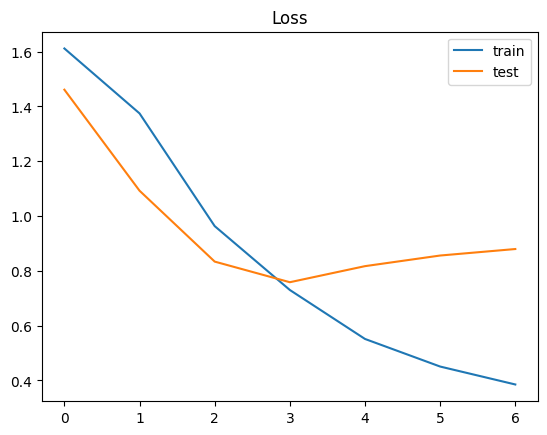

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

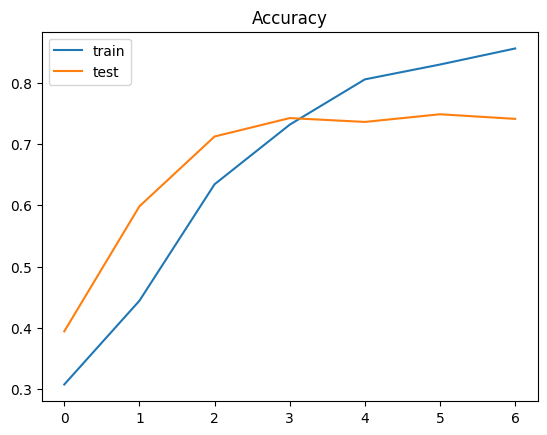

In [24]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [27]:
tweet_percobaan = ['Helehhh monyettt']
sequence = tokenize_tweet.texts_to_sequences(tweet_percobaan)
padded = pad_sequences(sequence, maxlen=MAX_SEQ_LENGTH)
prediction_tweet = model.predict(padded)
labels = ['Studi','Percintaan','Keluarga','Karir/Pekerjaan','Person/Personal','Tidak Diketahui Masalahnya']
print(prediction_tweet, labels[np.argmax(prediction_tweet)])

1/1 [==============================] - 0s 209ms/step
[[7.2099952e-05 2.9008187e-04 5.9202552e-04 2.9884058e-04 1.4657140e-03
  9.9728119e-01]] Tidak Diketahui Masalahnya


In [28]:
# Confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [29]:
preds = (model.predict(X_test) > 0.5).astype("int32")

28/28 [==============================] - 2s 72ms/step


In [30]:
c_report(Y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        75
           1       0.94      0.80      0.87       161
           2       0.84      0.77      0.80       179
           3       0.60      0.56      0.58       178
           4       0.86      0.84      0.85       143
           5       0.75      0.85      0.80       151

   micro avg       0.80      0.75      0.77       887
   macro avg       0.81      0.75      0.78       887
weighted avg       0.80      0.75      0.77       887
 samples avg       0.75      0.75      0.75       887

Accuracy : 0.7508455467869222


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7508455467869222

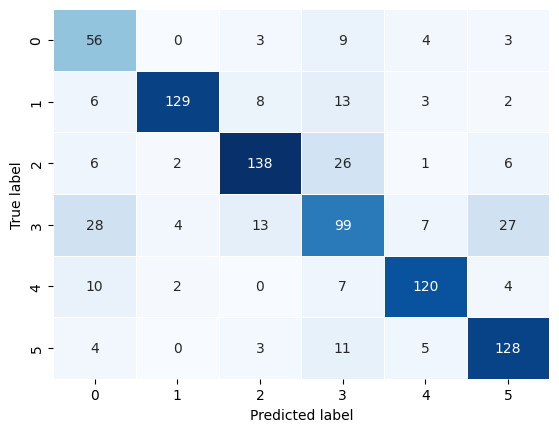

In [31]:
plot_confusion_matrix(Y_test.argmax(axis=1), preds.argmax(axis=1))